## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import californiaDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 


In [3]:
X,Y = californiaDataset.california_data()
n_features = 8 
n_samples = 20640
n_target = 1 

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.609
Model:                            OLS   Adj. R-squared (uncentered):              0.608
Method:                 Least Squares   F-statistic:                              3209.
Date:                Fri, 24 Dec 2021   Prob (F-statistic):                        0.00
Time:                        19:13:18   Log-Likelihood:                         -15744.
No. Observations:               16512   AIC:                                  3.150e+04
Df Residuals:                   16504   BIC:                                  3.157e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

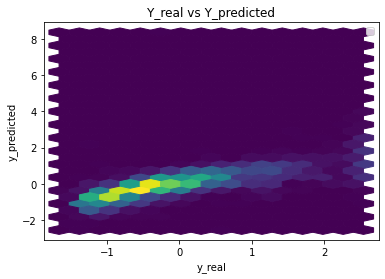

Performance Metrics
Mean Squared Error: 0.39755631006327735
Mean Absolute Error: 0.45642918449705144
Manhattan distance: 1884.1396736038282
Euclidean distance: 40.51064610619302


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.3842623752699841


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.064294
0:	learn: 0.9646565	total: 61.1ms	remaining: 1m 1s
1:	learn: 0.9327216	total: 64.1ms	remaining: 32s
2:	learn: 0.9023557	total: 66.7ms	remaining: 22.2s
3:	learn: 0.8744287	total: 69.4ms	remaining: 17.3s
4:	learn: 0.8487918	total: 72.1ms	remaining: 14.4s
5:	learn: 0.8253403	total: 74.8ms	remaining: 12.4s
6:	learn: 0.8023420	total: 77.1ms	remaining: 10.9s
7:	learn: 0.7817244	total: 79.3ms	remaining: 9.84s
8:	learn: 0.7643300	total: 81.7ms	remaining: 9s
9:	learn: 0.7453207	total: 84.6ms	remaining: 8.38s
10:	learn: 0.7290249	total: 87.3ms	remaining: 7.84s
11:	learn: 0.7135515	total: 89.5ms	remaining: 7.37s
12:	learn: 0.6993187	total: 91.8ms	remaining: 6.97s
13:	learn: 0.6850508	total: 94.1ms	remaining: 6.63s
14:	learn: 0.6734511	total: 96.2ms	remaining: 6.32s
15:	learn: 0.6619991	total: 98.3ms	remaining: 6.04s
16:	learn: 0.6530587	total: 101ms	remaining: 5.83s
17:	learn: 0.6431099	total: 104ms	remaining: 5.69s
18:	learn: 0.6345139	total: 107ms	remaining: 5.51s


26:	learn: 0.5746950	total: 127ms	remaining: 4.59s
27:	learn: 0.5699444	total: 130ms	remaining: 4.51s
28:	learn: 0.5658128	total: 133ms	remaining: 4.46s
29:	learn: 0.5615714	total: 135ms	remaining: 4.38s
30:	learn: 0.5579029	total: 138ms	remaining: 4.3s
31:	learn: 0.5536466	total: 140ms	remaining: 4.24s
32:	learn: 0.5480547	total: 143ms	remaining: 4.2s
33:	learn: 0.5453727	total: 146ms	remaining: 4.14s
34:	learn: 0.5410984	total: 148ms	remaining: 4.09s
35:	learn: 0.5380643	total: 150ms	remaining: 4.03s
36:	learn: 0.5350950	total: 153ms	remaining: 3.98s
37:	learn: 0.5325735	total: 155ms	remaining: 3.92s
38:	learn: 0.5285336	total: 157ms	remaining: 3.87s
39:	learn: 0.5260359	total: 159ms	remaining: 3.83s
40:	learn: 0.5239912	total: 162ms	remaining: 3.78s
41:	learn: 0.5217914	total: 165ms	remaining: 3.75s
42:	learn: 0.5192968	total: 167ms	remaining: 3.72s
43:	learn: 0.5171857	total: 170ms	remaining: 3.69s
44:	learn: 0.5153067	total: 172ms	remaining: 3.65s
45:	learn: 0.5130916	total: 174ms

53:	learn: 0.4957379	total: 195ms	remaining: 3.42s
54:	learn: 0.4935300	total: 198ms	remaining: 3.41s
55:	learn: 0.4923752	total: 201ms	remaining: 3.39s
56:	learn: 0.4909337	total: 203ms	remaining: 3.37s
57:	learn: 0.4899454	total: 206ms	remaining: 3.34s
58:	learn: 0.4890383	total: 208ms	remaining: 3.32s
59:	learn: 0.4877112	total: 211ms	remaining: 3.3s
60:	learn: 0.4862905	total: 213ms	remaining: 3.28s
61:	learn: 0.4850997	total: 216ms	remaining: 3.27s
62:	learn: 0.4838767	total: 218ms	remaining: 3.24s
63:	learn: 0.4825868	total: 220ms	remaining: 3.22s
64:	learn: 0.4815507	total: 223ms	remaining: 3.21s
65:	learn: 0.4807482	total: 225ms	remaining: 3.19s
66:	learn: 0.4794230	total: 228ms	remaining: 3.18s
67:	learn: 0.4782664	total: 233ms	remaining: 3.19s
68:	learn: 0.4769318	total: 235ms	remaining: 3.17s
69:	learn: 0.4758996	total: 238ms	remaining: 3.16s
70:	learn: 0.4753655	total: 240ms	remaining: 3.14s
71:	learn: 0.4743307	total: 242ms	remaining: 3.12s
72:	learn: 0.4737719	total: 244m

104:	learn: 0.4494678	total: 322ms	remaining: 2.75s
105:	learn: 0.4491452	total: 325ms	remaining: 2.74s
106:	learn: 0.4486565	total: 327ms	remaining: 2.73s
107:	learn: 0.4478586	total: 330ms	remaining: 2.73s
108:	learn: 0.4472437	total: 332ms	remaining: 2.71s
109:	learn: 0.4469863	total: 335ms	remaining: 2.71s
110:	learn: 0.4464628	total: 337ms	remaining: 2.7s
111:	learn: 0.4459801	total: 339ms	remaining: 2.69s
112:	learn: 0.4452111	total: 341ms	remaining: 2.68s
113:	learn: 0.4447002	total: 345ms	remaining: 2.68s
114:	learn: 0.4440031	total: 347ms	remaining: 2.67s
115:	learn: 0.4434103	total: 350ms	remaining: 2.67s
116:	learn: 0.4431942	total: 352ms	remaining: 2.65s
117:	learn: 0.4428258	total: 354ms	remaining: 2.65s
118:	learn: 0.4420905	total: 356ms	remaining: 2.64s
119:	learn: 0.4415899	total: 359ms	remaining: 2.63s
120:	learn: 0.4410160	total: 362ms	remaining: 2.63s
121:	learn: 0.4407211	total: 364ms	remaining: 2.62s
122:	learn: 0.4400276	total: 366ms	remaining: 2.61s
123:	learn: 0

132:	learn: 0.4359297	total: 391ms	remaining: 2.55s
133:	learn: 0.4354109	total: 393ms	remaining: 2.54s
134:	learn: 0.4349750	total: 396ms	remaining: 2.54s
135:	learn: 0.4344524	total: 398ms	remaining: 2.53s
136:	learn: 0.4336962	total: 401ms	remaining: 2.52s
137:	learn: 0.4331674	total: 403ms	remaining: 2.52s
138:	learn: 0.4323864	total: 406ms	remaining: 2.51s
139:	learn: 0.4320406	total: 408ms	remaining: 2.51s
140:	learn: 0.4316608	total: 410ms	remaining: 2.5s
141:	learn: 0.4312502	total: 413ms	remaining: 2.49s
142:	learn: 0.4308543	total: 415ms	remaining: 2.48s
143:	learn: 0.4301505	total: 417ms	remaining: 2.48s
144:	learn: 0.4297806	total: 419ms	remaining: 2.47s
145:	learn: 0.4294899	total: 422ms	remaining: 2.47s
146:	learn: 0.4290247	total: 425ms	remaining: 2.47s
147:	learn: 0.4284660	total: 427ms	remaining: 2.46s
148:	learn: 0.4278585	total: 430ms	remaining: 2.45s
149:	learn: 0.4275097	total: 432ms	remaining: 2.45s
150:	learn: 0.4269875	total: 435ms	remaining: 2.44s
151:	learn: 0

184:	learn: 0.4118100	total: 518ms	remaining: 2.28s
185:	learn: 0.4112739	total: 520ms	remaining: 2.28s
186:	learn: 0.4108330	total: 523ms	remaining: 2.27s
187:	learn: 0.4105048	total: 526ms	remaining: 2.27s
188:	learn: 0.4101781	total: 528ms	remaining: 2.27s
189:	learn: 0.4098644	total: 530ms	remaining: 2.26s
190:	learn: 0.4095391	total: 533ms	remaining: 2.25s
191:	learn: 0.4091939	total: 535ms	remaining: 2.25s
192:	learn: 0.4088986	total: 537ms	remaining: 2.25s
193:	learn: 0.4085258	total: 540ms	remaining: 2.24s
194:	learn: 0.4082627	total: 542ms	remaining: 2.24s
195:	learn: 0.4077050	total: 545ms	remaining: 2.23s
196:	learn: 0.4072721	total: 548ms	remaining: 2.23s
197:	learn: 0.4069651	total: 550ms	remaining: 2.23s
198:	learn: 0.4064487	total: 552ms	remaining: 2.22s
199:	learn: 0.4061695	total: 556ms	remaining: 2.22s
200:	learn: 0.4058541	total: 558ms	remaining: 2.22s
201:	learn: 0.4056455	total: 561ms	remaining: 2.21s
202:	learn: 0.4050467	total: 564ms	remaining: 2.21s
203:	learn: 

211:	learn: 0.4018599	total: 587ms	remaining: 2.18s
212:	learn: 0.4015701	total: 590ms	remaining: 2.18s
213:	learn: 0.4012730	total: 592ms	remaining: 2.18s
214:	learn: 0.4009956	total: 596ms	remaining: 2.17s
215:	learn: 0.4005934	total: 598ms	remaining: 2.17s
216:	learn: 0.4003470	total: 601ms	remaining: 2.17s
217:	learn: 0.4000519	total: 604ms	remaining: 2.17s
218:	learn: 0.3995929	total: 606ms	remaining: 2.16s
219:	learn: 0.3990533	total: 609ms	remaining: 2.16s
220:	learn: 0.3988161	total: 611ms	remaining: 2.15s
221:	learn: 0.3984288	total: 614ms	remaining: 2.15s
222:	learn: 0.3981115	total: 616ms	remaining: 2.15s
223:	learn: 0.3979413	total: 619ms	remaining: 2.14s
224:	learn: 0.3977528	total: 621ms	remaining: 2.14s
225:	learn: 0.3973479	total: 624ms	remaining: 2.13s
226:	learn: 0.3970586	total: 626ms	remaining: 2.13s
227:	learn: 0.3967204	total: 628ms	remaining: 2.13s
228:	learn: 0.3964576	total: 630ms	remaining: 2.12s
229:	learn: 0.3961645	total: 633ms	remaining: 2.12s
230:	learn: 

263:	learn: 0.3874976	total: 714ms	remaining: 1.99s
264:	learn: 0.3872378	total: 717ms	remaining: 1.99s
265:	learn: 0.3869882	total: 720ms	remaining: 1.99s
266:	learn: 0.3867340	total: 723ms	remaining: 1.98s
267:	learn: 0.3864606	total: 725ms	remaining: 1.98s
268:	learn: 0.3862060	total: 727ms	remaining: 1.98s
269:	learn: 0.3859811	total: 730ms	remaining: 1.97s
270:	learn: 0.3857962	total: 733ms	remaining: 1.97s
271:	learn: 0.3853724	total: 735ms	remaining: 1.97s
272:	learn: 0.3851259	total: 738ms	remaining: 1.96s
273:	learn: 0.3849306	total: 740ms	remaining: 1.96s
274:	learn: 0.3846835	total: 742ms	remaining: 1.96s
275:	learn: 0.3844848	total: 746ms	remaining: 1.96s
276:	learn: 0.3843642	total: 749ms	remaining: 1.95s
277:	learn: 0.3840907	total: 751ms	remaining: 1.95s
278:	learn: 0.3838469	total: 753ms	remaining: 1.95s
279:	learn: 0.3835939	total: 756ms	remaining: 1.94s
280:	learn: 0.3831321	total: 759ms	remaining: 1.94s
281:	learn: 0.3828955	total: 761ms	remaining: 1.94s
282:	learn: 

289:	learn: 0.3807838	total: 781ms	remaining: 1.91s
290:	learn: 0.3805073	total: 783ms	remaining: 1.91s
291:	learn: 0.3802817	total: 785ms	remaining: 1.9s
292:	learn: 0.3798787	total: 788ms	remaining: 1.9s
293:	learn: 0.3795741	total: 790ms	remaining: 1.9s
294:	learn: 0.3794301	total: 792ms	remaining: 1.89s
295:	learn: 0.3791805	total: 796ms	remaining: 1.89s
296:	learn: 0.3790261	total: 798ms	remaining: 1.89s
297:	learn: 0.3788087	total: 800ms	remaining: 1.88s
298:	learn: 0.3786534	total: 802ms	remaining: 1.88s
299:	learn: 0.3784701	total: 805ms	remaining: 1.88s
300:	learn: 0.3782840	total: 807ms	remaining: 1.87s
301:	learn: 0.3781038	total: 809ms	remaining: 1.87s
302:	learn: 0.3778805	total: 812ms	remaining: 1.87s
303:	learn: 0.3776068	total: 814ms	remaining: 1.86s
304:	learn: 0.3773294	total: 816ms	remaining: 1.86s
305:	learn: 0.3771651	total: 818ms	remaining: 1.86s
306:	learn: 0.3768871	total: 821ms	remaining: 1.85s
307:	learn: 0.3764989	total: 823ms	remaining: 1.85s
308:	learn: 0.3

343:	learn: 0.3694343	total: 909ms	remaining: 1.73s
344:	learn: 0.3692002	total: 911ms	remaining: 1.73s
345:	learn: 0.3690151	total: 914ms	remaining: 1.73s
346:	learn: 0.3687924	total: 916ms	remaining: 1.72s
347:	learn: 0.3685880	total: 919ms	remaining: 1.72s
348:	learn: 0.3684970	total: 922ms	remaining: 1.72s
349:	learn: 0.3682819	total: 924ms	remaining: 1.72s
350:	learn: 0.3681111	total: 926ms	remaining: 1.71s
351:	learn: 0.3678356	total: 929ms	remaining: 1.71s
352:	learn: 0.3677249	total: 931ms	remaining: 1.71s
353:	learn: 0.3675005	total: 933ms	remaining: 1.7s
354:	learn: 0.3672738	total: 936ms	remaining: 1.7s
355:	learn: 0.3670968	total: 938ms	remaining: 1.7s
356:	learn: 0.3668522	total: 940ms	remaining: 1.69s
357:	learn: 0.3667077	total: 943ms	remaining: 1.69s
358:	learn: 0.3665191	total: 945ms	remaining: 1.69s
359:	learn: 0.3663677	total: 947ms	remaining: 1.68s
360:	learn: 0.3662954	total: 950ms	remaining: 1.68s
361:	learn: 0.3660735	total: 952ms	remaining: 1.68s
362:	learn: 0.3

370:	learn: 0.3639537	total: 975ms	remaining: 1.65s
371:	learn: 0.3638014	total: 977ms	remaining: 1.65s
372:	learn: 0.3635975	total: 979ms	remaining: 1.65s
373:	learn: 0.3634211	total: 982ms	remaining: 1.64s
374:	learn: 0.3632830	total: 985ms	remaining: 1.64s
375:	learn: 0.3630338	total: 989ms	remaining: 1.64s
376:	learn: 0.3628210	total: 991ms	remaining: 1.64s
377:	learn: 0.3626095	total: 993ms	remaining: 1.63s
378:	learn: 0.3624359	total: 996ms	remaining: 1.63s
379:	learn: 0.3622525	total: 998ms	remaining: 1.63s
380:	learn: 0.3620588	total: 1s	remaining: 1.63s
381:	learn: 0.3618615	total: 1s	remaining: 1.62s
382:	learn: 0.3616260	total: 1s	remaining: 1.62s
383:	learn: 0.3615117	total: 1.01s	remaining: 1.62s
384:	learn: 0.3613219	total: 1.01s	remaining: 1.61s
385:	learn: 0.3611388	total: 1.01s	remaining: 1.61s
386:	learn: 0.3610053	total: 1.01s	remaining: 1.61s
387:	learn: 0.3608431	total: 1.02s	remaining: 1.6s
388:	learn: 0.3606297	total: 1.02s	remaining: 1.6s
389:	learn: 0.3604650	t

421:	learn: 0.3549329	total: 1.1s	remaining: 1.51s
422:	learn: 0.3547414	total: 1.1s	remaining: 1.51s
423:	learn: 0.3545994	total: 1.11s	remaining: 1.5s
424:	learn: 0.3544550	total: 1.11s	remaining: 1.5s
425:	learn: 0.3543167	total: 1.11s	remaining: 1.5s
426:	learn: 0.3541498	total: 1.11s	remaining: 1.5s
427:	learn: 0.3540044	total: 1.12s	remaining: 1.49s
428:	learn: 0.3539136	total: 1.12s	remaining: 1.49s
429:	learn: 0.3537103	total: 1.12s	remaining: 1.49s
430:	learn: 0.3535302	total: 1.12s	remaining: 1.48s
431:	learn: 0.3534207	total: 1.13s	remaining: 1.48s
432:	learn: 0.3533199	total: 1.13s	remaining: 1.48s
433:	learn: 0.3531129	total: 1.13s	remaining: 1.48s
434:	learn: 0.3529546	total: 1.13s	remaining: 1.47s
435:	learn: 0.3528016	total: 1.14s	remaining: 1.47s
436:	learn: 0.3525198	total: 1.14s	remaining: 1.47s
437:	learn: 0.3524326	total: 1.14s	remaining: 1.46s
438:	learn: 0.3521912	total: 1.14s	remaining: 1.46s
439:	learn: 0.3520305	total: 1.15s	remaining: 1.46s
440:	learn: 0.3518

447:	learn: 0.3508529	total: 1.17s	remaining: 1.44s
448:	learn: 0.3507518	total: 1.17s	remaining: 1.44s
449:	learn: 0.3506264	total: 1.17s	remaining: 1.43s
450:	learn: 0.3504439	total: 1.18s	remaining: 1.43s
451:	learn: 0.3503591	total: 1.18s	remaining: 1.43s
452:	learn: 0.3502411	total: 1.18s	remaining: 1.43s
453:	learn: 0.3500975	total: 1.18s	remaining: 1.42s
454:	learn: 0.3499401	total: 1.19s	remaining: 1.42s
455:	learn: 0.3497301	total: 1.19s	remaining: 1.42s
456:	learn: 0.3494654	total: 1.19s	remaining: 1.42s
457:	learn: 0.3493457	total: 1.19s	remaining: 1.41s
458:	learn: 0.3492377	total: 1.2s	remaining: 1.41s
459:	learn: 0.3490701	total: 1.2s	remaining: 1.41s
460:	learn: 0.3489065	total: 1.2s	remaining: 1.41s
461:	learn: 0.3488221	total: 1.21s	remaining: 1.4s
462:	learn: 0.3486498	total: 1.21s	remaining: 1.4s
463:	learn: 0.3484944	total: 1.21s	remaining: 1.4s
464:	learn: 0.3483678	total: 1.21s	remaining: 1.39s
465:	learn: 0.3482070	total: 1.21s	remaining: 1.39s
466:	learn: 0.3480

494:	learn: 0.3438251	total: 1.3s	remaining: 1.32s
495:	learn: 0.3437408	total: 1.3s	remaining: 1.32s
496:	learn: 0.3436169	total: 1.3s	remaining: 1.32s
497:	learn: 0.3435521	total: 1.3s	remaining: 1.32s
498:	learn: 0.3434758	total: 1.31s	remaining: 1.31s
499:	learn: 0.3433206	total: 1.32s	remaining: 1.32s
500:	learn: 0.3431966	total: 1.32s	remaining: 1.31s
501:	learn: 0.3430118	total: 1.32s	remaining: 1.31s
502:	learn: 0.3428767	total: 1.32s	remaining: 1.31s
503:	learn: 0.3427680	total: 1.33s	remaining: 1.31s
504:	learn: 0.3425772	total: 1.33s	remaining: 1.3s
505:	learn: 0.3424320	total: 1.33s	remaining: 1.3s
506:	learn: 0.3422918	total: 1.33s	remaining: 1.3s
507:	learn: 0.3421270	total: 1.34s	remaining: 1.29s
508:	learn: 0.3419902	total: 1.34s	remaining: 1.29s
509:	learn: 0.3418705	total: 1.34s	remaining: 1.29s
510:	learn: 0.3416989	total: 1.35s	remaining: 1.29s
511:	learn: 0.3414293	total: 1.35s	remaining: 1.29s
512:	learn: 0.3413458	total: 1.35s	remaining: 1.28s
513:	learn: 0.34121

517:	learn: 0.3405623	total: 1.36s	remaining: 1.27s
518:	learn: 0.3404243	total: 1.37s	remaining: 1.27s
519:	learn: 0.3402964	total: 1.37s	remaining: 1.26s
520:	learn: 0.3401958	total: 1.37s	remaining: 1.26s
521:	learn: 0.3400739	total: 1.37s	remaining: 1.26s
522:	learn: 0.3400269	total: 1.38s	remaining: 1.25s
523:	learn: 0.3398079	total: 1.38s	remaining: 1.25s
524:	learn: 0.3395959	total: 1.38s	remaining: 1.25s
525:	learn: 0.3394489	total: 1.38s	remaining: 1.25s
526:	learn: 0.3392949	total: 1.39s	remaining: 1.24s
527:	learn: 0.3390657	total: 1.39s	remaining: 1.24s
528:	learn: 0.3388989	total: 1.39s	remaining: 1.24s
529:	learn: 0.3387750	total: 1.39s	remaining: 1.24s
530:	learn: 0.3385665	total: 1.4s	remaining: 1.23s
531:	learn: 0.3384066	total: 1.4s	remaining: 1.23s
532:	learn: 0.3383341	total: 1.4s	remaining: 1.23s
533:	learn: 0.3382063	total: 1.4s	remaining: 1.22s
534:	learn: 0.3380163	total: 1.41s	remaining: 1.22s
535:	learn: 0.3378598	total: 1.41s	remaining: 1.22s
536:	learn: 0.33

568:	learn: 0.3338420	total: 1.49s	remaining: 1.13s
569:	learn: 0.3337468	total: 1.5s	remaining: 1.13s
570:	learn: 0.3335741	total: 1.5s	remaining: 1.13s
571:	learn: 0.3334434	total: 1.5s	remaining: 1.12s
572:	learn: 0.3333572	total: 1.5s	remaining: 1.12s
573:	learn: 0.3332451	total: 1.5s	remaining: 1.12s
574:	learn: 0.3331611	total: 1.51s	remaining: 1.11s
575:	learn: 0.3330522	total: 1.51s	remaining: 1.11s
576:	learn: 0.3329154	total: 1.51s	remaining: 1.11s
577:	learn: 0.3328120	total: 1.51s	remaining: 1.1s
578:	learn: 0.3326839	total: 1.52s	remaining: 1.1s
579:	learn: 0.3325565	total: 1.52s	remaining: 1.1s
580:	learn: 0.3324379	total: 1.52s	remaining: 1.1s
581:	learn: 0.3322992	total: 1.52s	remaining: 1.09s
582:	learn: 0.3321779	total: 1.53s	remaining: 1.09s
583:	learn: 0.3320629	total: 1.53s	remaining: 1.09s
584:	learn: 0.3319217	total: 1.53s	remaining: 1.09s
585:	learn: 0.3318158	total: 1.53s	remaining: 1.08s
586:	learn: 0.3317336	total: 1.54s	remaining: 1.08s
587:	learn: 0.3316353

595:	learn: 0.3307062	total: 1.56s	remaining: 1.06s
596:	learn: 0.3306066	total: 1.56s	remaining: 1.05s
597:	learn: 0.3305477	total: 1.56s	remaining: 1.05s
598:	learn: 0.3304545	total: 1.57s	remaining: 1.05s
599:	learn: 0.3303152	total: 1.57s	remaining: 1.05s
600:	learn: 0.3302168	total: 1.57s	remaining: 1.04s
601:	learn: 0.3301115	total: 1.57s	remaining: 1.04s
602:	learn: 0.3300324	total: 1.58s	remaining: 1.04s
603:	learn: 0.3299507	total: 1.58s	remaining: 1.03s
604:	learn: 0.3298439	total: 1.58s	remaining: 1.03s
605:	learn: 0.3297299	total: 1.58s	remaining: 1.03s
606:	learn: 0.3296187	total: 1.59s	remaining: 1.03s
607:	learn: 0.3295100	total: 1.59s	remaining: 1.02s
608:	learn: 0.3294120	total: 1.59s	remaining: 1.02s
609:	learn: 0.3293184	total: 1.59s	remaining: 1.02s
610:	learn: 0.3292188	total: 1.6s	remaining: 1.02s
611:	learn: 0.3291187	total: 1.6s	remaining: 1.01s
612:	learn: 0.3289621	total: 1.6s	remaining: 1.01s
613:	learn: 0.3287835	total: 1.6s	remaining: 1.01s
614:	learn: 0.32

646:	learn: 0.3251872	total: 1.69s	remaining: 921ms
647:	learn: 0.3250914	total: 1.69s	remaining: 918ms
648:	learn: 0.3250063	total: 1.69s	remaining: 915ms
649:	learn: 0.3248810	total: 1.7s	remaining: 913ms
650:	learn: 0.3247534	total: 1.7s	remaining: 910ms
651:	learn: 0.3246797	total: 1.7s	remaining: 907ms
652:	learn: 0.3246165	total: 1.7s	remaining: 905ms
653:	learn: 0.3245008	total: 1.7s	remaining: 902ms
654:	learn: 0.3244028	total: 1.71s	remaining: 899ms
655:	learn: 0.3242574	total: 1.71s	remaining: 897ms
656:	learn: 0.3241092	total: 1.71s	remaining: 894ms
657:	learn: 0.3240244	total: 1.72s	remaining: 892ms
658:	learn: 0.3239094	total: 1.72s	remaining: 890ms
659:	learn: 0.3237755	total: 1.72s	remaining: 887ms
660:	learn: 0.3236296	total: 1.72s	remaining: 884ms
661:	learn: 0.3234465	total: 1.73s	remaining: 882ms
662:	learn: 0.3233592	total: 1.73s	remaining: 879ms
663:	learn: 0.3232849	total: 1.73s	remaining: 876ms
664:	learn: 0.3232212	total: 1.73s	remaining: 874ms
665:	learn: 0.323

673:	learn: 0.3224057	total: 1.76s	remaining: 850ms
674:	learn: 0.3222924	total: 1.76s	remaining: 847ms
675:	learn: 0.3222305	total: 1.76s	remaining: 844ms
676:	learn: 0.3221572	total: 1.76s	remaining: 842ms
677:	learn: 0.3220871	total: 1.77s	remaining: 839ms
678:	learn: 0.3219662	total: 1.77s	remaining: 836ms
679:	learn: 0.3218892	total: 1.77s	remaining: 834ms
680:	learn: 0.3217398	total: 1.77s	remaining: 831ms
681:	learn: 0.3216632	total: 1.78s	remaining: 828ms
682:	learn: 0.3215424	total: 1.78s	remaining: 826ms
683:	learn: 0.3214356	total: 1.78s	remaining: 823ms
684:	learn: 0.3213685	total: 1.78s	remaining: 820ms
685:	learn: 0.3212600	total: 1.79s	remaining: 818ms
686:	learn: 0.3211433	total: 1.79s	remaining: 815ms
687:	learn: 0.3210393	total: 1.79s	remaining: 812ms
688:	learn: 0.3209580	total: 1.79s	remaining: 810ms
689:	learn: 0.3208786	total: 1.8s	remaining: 807ms
690:	learn: 0.3207001	total: 1.8s	remaining: 805ms
691:	learn: 0.3206093	total: 1.8s	remaining: 802ms
692:	learn: 0.3

724:	learn: 0.3174152	total: 1.88s	remaining: 714ms
725:	learn: 0.3173477	total: 1.89s	remaining: 711ms
726:	learn: 0.3172412	total: 1.89s	remaining: 709ms
727:	learn: 0.3171725	total: 1.89s	remaining: 706ms
728:	learn: 0.3170697	total: 1.89s	remaining: 704ms
729:	learn: 0.3169294	total: 1.9s	remaining: 701ms
730:	learn: 0.3167881	total: 1.9s	remaining: 698ms
731:	learn: 0.3167058	total: 1.9s	remaining: 696ms
732:	learn: 0.3166255	total: 1.9s	remaining: 693ms
733:	learn: 0.3165624	total: 1.9s	remaining: 690ms
734:	learn: 0.3165078	total: 1.91s	remaining: 688ms
735:	learn: 0.3164131	total: 1.91s	remaining: 685ms
736:	learn: 0.3163165	total: 1.91s	remaining: 682ms
737:	learn: 0.3161686	total: 1.91s	remaining: 680ms
738:	learn: 0.3160995	total: 1.92s	remaining: 677ms
739:	learn: 0.3160434	total: 1.92s	remaining: 674ms
740:	learn: 0.3159845	total: 1.92s	remaining: 672ms
741:	learn: 0.3159020	total: 1.92s	remaining: 669ms
742:	learn: 0.3157968	total: 1.93s	remaining: 666ms
743:	learn: 0.315

753:	learn: 0.3147957	total: 1.95s	remaining: 637ms
754:	learn: 0.3147441	total: 1.96s	remaining: 634ms
755:	learn: 0.3146873	total: 1.96s	remaining: 632ms
756:	learn: 0.3145855	total: 1.96s	remaining: 629ms
757:	learn: 0.3144587	total: 1.96s	remaining: 627ms
758:	learn: 0.3143885	total: 1.97s	remaining: 624ms
759:	learn: 0.3142753	total: 1.97s	remaining: 621ms
760:	learn: 0.3141453	total: 1.97s	remaining: 619ms
761:	learn: 0.3140379	total: 1.97s	remaining: 616ms
762:	learn: 0.3138952	total: 1.97s	remaining: 613ms
763:	learn: 0.3138484	total: 1.98s	remaining: 611ms
764:	learn: 0.3137466	total: 1.98s	remaining: 608ms
765:	learn: 0.3136473	total: 1.98s	remaining: 605ms
766:	learn: 0.3135050	total: 1.98s	remaining: 603ms
767:	learn: 0.3134149	total: 1.99s	remaining: 600ms
768:	learn: 0.3132878	total: 1.99s	remaining: 598ms
769:	learn: 0.3132221	total: 1.99s	remaining: 595ms
770:	learn: 0.3131213	total: 1.99s	remaining: 592ms
771:	learn: 0.3130139	total: 2s	remaining: 590ms
772:	learn: 0.3

804:	learn: 0.3100892	total: 2.08s	remaining: 504ms
805:	learn: 0.3100150	total: 2.08s	remaining: 501ms
806:	learn: 0.3099590	total: 2.08s	remaining: 498ms
807:	learn: 0.3098523	total: 2.09s	remaining: 496ms
808:	learn: 0.3097603	total: 2.09s	remaining: 493ms
809:	learn: 0.3096130	total: 2.09s	remaining: 491ms
810:	learn: 0.3095519	total: 2.09s	remaining: 488ms
811:	learn: 0.3094948	total: 2.1s	remaining: 486ms
812:	learn: 0.3093352	total: 2.1s	remaining: 483ms
813:	learn: 0.3092509	total: 2.1s	remaining: 480ms
814:	learn: 0.3091595	total: 2.1s	remaining: 478ms
815:	learn: 0.3090766	total: 2.11s	remaining: 475ms
816:	learn: 0.3089450	total: 2.11s	remaining: 473ms
817:	learn: 0.3088589	total: 2.11s	remaining: 470ms
818:	learn: 0.3087250	total: 2.11s	remaining: 467ms
819:	learn: 0.3085683	total: 2.12s	remaining: 465ms
820:	learn: 0.3084927	total: 2.12s	remaining: 462ms
821:	learn: 0.3084296	total: 2.12s	remaining: 459ms
822:	learn: 0.3083799	total: 2.12s	remaining: 457ms
823:	learn: 0.30

832:	learn: 0.3075971	total: 2.15s	remaining: 431ms
833:	learn: 0.3075133	total: 2.15s	remaining: 428ms
834:	learn: 0.3074713	total: 2.15s	remaining: 426ms
835:	learn: 0.3073887	total: 2.16s	remaining: 423ms
836:	learn: 0.3073092	total: 2.16s	remaining: 420ms
837:	learn: 0.3072069	total: 2.16s	remaining: 418ms
838:	learn: 0.3071446	total: 2.16s	remaining: 415ms
839:	learn: 0.3070764	total: 2.17s	remaining: 413ms
840:	learn: 0.3070260	total: 2.17s	remaining: 411ms
841:	learn: 0.3069261	total: 2.17s	remaining: 408ms
842:	learn: 0.3068044	total: 2.18s	remaining: 406ms
843:	learn: 0.3067236	total: 2.18s	remaining: 403ms
844:	learn: 0.3066379	total: 2.18s	remaining: 400ms
845:	learn: 0.3065495	total: 2.19s	remaining: 398ms
846:	learn: 0.3064687	total: 2.19s	remaining: 395ms
847:	learn: 0.3063777	total: 2.19s	remaining: 393ms
848:	learn: 0.3062788	total: 2.19s	remaining: 390ms
849:	learn: 0.3061950	total: 2.19s	remaining: 387ms
850:	learn: 0.3061109	total: 2.2s	remaining: 385ms
851:	learn: 0

881:	learn: 0.3036375	total: 2.27s	remaining: 304ms
882:	learn: 0.3035929	total: 2.27s	remaining: 301ms
883:	learn: 0.3035212	total: 2.28s	remaining: 299ms
884:	learn: 0.3034075	total: 2.28s	remaining: 296ms
885:	learn: 0.3032841	total: 2.28s	remaining: 294ms
886:	learn: 0.3032153	total: 2.29s	remaining: 291ms
887:	learn: 0.3031165	total: 2.29s	remaining: 289ms
888:	learn: 0.3030705	total: 2.29s	remaining: 286ms
889:	learn: 0.3029251	total: 2.29s	remaining: 283ms
890:	learn: 0.3028558	total: 2.29s	remaining: 281ms
891:	learn: 0.3028115	total: 2.3s	remaining: 278ms
892:	learn: 0.3027500	total: 2.3s	remaining: 276ms
893:	learn: 0.3026336	total: 2.3s	remaining: 273ms
894:	learn: 0.3025577	total: 2.3s	remaining: 270ms
895:	learn: 0.3024768	total: 2.31s	remaining: 268ms
896:	learn: 0.3024016	total: 2.31s	remaining: 265ms
897:	learn: 0.3023058	total: 2.31s	remaining: 263ms
898:	learn: 0.3021940	total: 2.31s	remaining: 260ms
899:	learn: 0.3021359	total: 2.32s	remaining: 257ms
900:	learn: 0.30

910:	learn: 0.3013404	total: 2.34s	remaining: 229ms
911:	learn: 0.3012545	total: 2.35s	remaining: 227ms
912:	learn: 0.3011954	total: 2.35s	remaining: 224ms
913:	learn: 0.3011436	total: 2.35s	remaining: 221ms
914:	learn: 0.3010167	total: 2.35s	remaining: 219ms
915:	learn: 0.3009336	total: 2.36s	remaining: 216ms
916:	learn: 0.3008364	total: 2.36s	remaining: 214ms
917:	learn: 0.3007567	total: 2.36s	remaining: 211ms
918:	learn: 0.3006906	total: 2.37s	remaining: 209ms
919:	learn: 0.3005964	total: 2.37s	remaining: 206ms
920:	learn: 0.3004883	total: 2.37s	remaining: 203ms
921:	learn: 0.3004343	total: 2.37s	remaining: 201ms
922:	learn: 0.3003606	total: 2.38s	remaining: 198ms
923:	learn: 0.3002995	total: 2.38s	remaining: 196ms
924:	learn: 0.3001942	total: 2.38s	remaining: 193ms
925:	learn: 0.3000924	total: 2.38s	remaining: 191ms
926:	learn: 0.3000304	total: 2.39s	remaining: 188ms
927:	learn: 0.2999819	total: 2.39s	remaining: 185ms
928:	learn: 0.2998605	total: 2.39s	remaining: 183ms
929:	learn: 

959:	learn: 0.2975311	total: 2.47s	remaining: 103ms
960:	learn: 0.2974467	total: 2.47s	remaining: 100ms
961:	learn: 0.2973920	total: 2.47s	remaining: 97.7ms
962:	learn: 0.2973089	total: 2.48s	remaining: 95.2ms
963:	learn: 0.2972541	total: 2.48s	remaining: 92.6ms
964:	learn: 0.2971826	total: 2.48s	remaining: 90ms
965:	learn: 0.2971189	total: 2.48s	remaining: 87.4ms
966:	learn: 0.2970167	total: 2.49s	remaining: 84.9ms
967:	learn: 0.2969179	total: 2.49s	remaining: 82.3ms
968:	learn: 0.2968536	total: 2.49s	remaining: 79.7ms
969:	learn: 0.2967836	total: 2.5s	remaining: 77.2ms
970:	learn: 0.2966505	total: 2.5s	remaining: 74.6ms
971:	learn: 0.2965907	total: 2.5s	remaining: 72ms
972:	learn: 0.2965054	total: 2.5s	remaining: 69.4ms
973:	learn: 0.2963869	total: 2.5s	remaining: 66.9ms
974:	learn: 0.2963036	total: 2.51s	remaining: 64.3ms
975:	learn: 0.2962630	total: 2.51s	remaining: 61.7ms
976:	learn: 0.2961985	total: 2.51s	remaining: 59.1ms
977:	learn: 0.2961453	total: 2.51s	remaining: 56.6ms
978:

987:	learn: 0.2953741	total: 2.54s	remaining: 30.8ms
988:	learn: 0.2953398	total: 2.54s	remaining: 28.3ms
989:	learn: 0.2952539	total: 2.54s	remaining: 25.7ms
990:	learn: 0.2952158	total: 2.55s	remaining: 23.1ms
991:	learn: 0.2951061	total: 2.55s	remaining: 20.6ms
992:	learn: 0.2950443	total: 2.55s	remaining: 18ms
993:	learn: 0.2949607	total: 2.55s	remaining: 15.4ms
994:	learn: 0.2949356	total: 2.56s	remaining: 12.8ms
995:	learn: 0.2948705	total: 2.56s	remaining: 10.3ms
996:	learn: 0.2948195	total: 2.56s	remaining: 7.71ms
997:	learn: 0.2947405	total: 2.56s	remaining: 5.14ms
998:	learn: 0.2946501	total: 2.57s	remaining: 2.57ms
999:	learn: 0.2945823	total: 2.57s	remaining: 0us
Mean Squared error 0.14685990254776077


## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 1000
batch_size = 1000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 0.9967385437335265
